In [1]:
import urllib3
from urllib3 import request
import certifi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
http = urllib3.PoolManager(
       cert_reqs='CERT_REQUIRED',
       ca_certs=certifi.where())

In [3]:
url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/MapServer/2/query?where=1%3D1&outFields=*&outSR=4326&f=json'

r = http.request('GET', url)
r.status

200

In [4]:
data = json.loads(r.data.decode('utf-8'))
data
df = pd.json_normalize(data, 'features')
df.head(10)

,attributes.CCN,attributes.REPORT_DAT,attributes.SHIFT,attributes.METHOD,attributes.OFFENSE,attributes.BLOCK,attributes.XBLOCK,attributes.YBLOCK,attributes.WARD,attributes.ANC,...,attributes.VOTING_PRECINCT,attributes.LATITUDE,attributes.LONGITUDE,attributes.BID,attributes.START_DATE,attributes.END_DATE,attributes.OBJECTID,attributes.OCTO_RECORD_ID,geometry.x,geometry.y
0,20001467,1578061992000,DAY,GUN,ROBBERY,1700 - 1799 BLOCK OF LAMONT STREET NW,396526.250000,140396.820000,1,1D,...,Precinct 40,38.931446,-77.040064,None,1578054901000,1.578057e+12,313157312,None,-77.040066,38.931454
1,20113090,1596892292000,DAY,OTHERS,MOTOR VEHICLE THEFT,3100 - 3199 BLOCK OF CENTRAL AVENUE NE,402876.270000,140291.600000,5,5C,...,Precinct 71,38.930500,-76.966828,None,1596889795000,1.596892e+12,313157358,None,-76.966830,38.930508
2,20114015,1597060926000,DAY,GUN,ASSAULT W/DANGEROUS WEAPON,1100 - 1199 BLOCK OF VARNEY STREET SE,400980.756543,129823.661622,8,8E,...,Precinct 121,38.836205,-76.988704,None,1597049434000,NaN,313157359,None,-76.988706,38.836213
3,20116072,1597414472000,DAY,OTHERS,THEFT/OTHER,4000 - 4099 BLOCK OF GEORGIA AVENUE NW,397823.780000,141376.730000,4,4C,...,Precinct 47,38.940277,-77.025102,None,1597412998000,NaN,313157360,None,-77.025104,38.940285
4,20117914,1597760794000,DAY,OTHERS,BURGLARY,1101 - 1128 BLOCK OF CHICAGO STREET SE,400689.280000,132949.960000,8,8A,...,Precinct 119,38.864368,-76.992058,ANACOSTIA,1597708846000,1.597750e+12,313157361,None,-76.992060,38.864376
5,20015799,1580076167000,EVENING,OTHERS,MOTOR VEHICLE THEFT,2900 - 3099 BLOCK OF NEWTON STREET NE,402928.440000,140690.820000,5,5B,...,Precinct 69,38.934096,-76.966224,None,1579993208000,1.580040e+12,313157388,None,-76.966227,38.934104
6,20015829,1580078456000,EVENING,OTHERS,THEFT F/AUTO,1200 - 1221 BLOCK OF 17TH STREET NW,396660.620000,137583.460000,2,2C,...,Precinct 17,38.906103,-77.038500,GOLDEN TRIANGLE,1579988716000,1.580057e+12,313157389,None,-77.038503,38.906111
7,20019010,1580521261000,EVENING,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF G STREET SE,400686.359999,134825.809595,6,6B,...,Precinct 90,38.881267,-76.992090,CAPITOL HILL,1580508441000,1.580509e+12,313157390,None,-76.992092,38.881275
8,20021828,1580930148000,DAY,OTHERS,THEFT F/AUTO,1700 - 1789 BLOCK OF ALLISON STREET NW,396542.710000,141909.040000,4,4E,...,Precinct 48,38.945068,-77.039882,None,1580922047000,1.580930e+12,313157391,None,-77.039884,38.945076
9,20022463,1581011209000,DAY,OTHERS,THEFT F/AUTO,6500 - 6599 BLOCK OF PINEY BRANCH ROAD NW,397769.620000,144596.230000,4,4B,...,Precinct 59,38.969279,-77.025737,None,1581006032000,1.581007e+12,313157392,None,-77.025740,38.969287


In [5]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
#transpose of df.describe() 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
attributes.REPORT_DAT,1000.0,1.592461e+12,9.574961e+09,1.577881e+12,1.583570e+12,1.592141e+12,1.600711e+12,1.609469e+12
attributes.XBLOCK,1000.0,3.992541e+05,3.101883e+03,3.905976e+05,3.972288e+05,3.990563e+05,4.011244e+05,4.076680e+05
attributes.YBLOCK,1000.0,1.377022e+05,3.363337e+03,1.280991e+05,1.360509e+05,1.377098e+05,1.395869e+05,1.466910e+05
attributes.LATITUDE,1000.0,3.890717e+01,3.029708e-02,3.882067e+01,3.889228e+01,3.890724e+01,3.892415e+01,3.898815e+01
attributes.LONGITUDE,1000.0,-7.700861e+01,3.576405e-02,-7.710844e+01,-7.703195e+01,-7.701087e+01,-7.698704e+01,-7.691161e+01
attributes.START_DATE,1000.0,1.592276e+12,9.616040e+09,1.567347e+12,1.583517e+12,1.591890e+12,1.600629e+12,1.609419e+12
attributes.END_DATE,878.0,1.592317e+12,9.490957e+09,1.576777e+12,1.583708e+12,1.591746e+12,1.600679e+12,1.609420e+12
attributes.OBJECTID,1000.0,3.131618e+08,6.048055e+03,3.131543e+08,3.131562e+08,3.131577e+08,3.131674e+08,3.131762e+08
geometry.x,1000.0,-7.700861e+01,3.576406e-02,-7.710844e+01,-7.703195e+01,-7.701088e+01,-7.698704e+01,-7.691161e+01
geometry.y,1000.0,3.890718e+01,3.029708e-02,3.882068e+01,3.889229e+01,3.890725e+01,3.892416e+01,3.898815e+01


In [7]:
dfTypes = df.dtypes
print(dfTypes)

attributes.CCN                      object
attributes.REPORT_DAT                int64
attributes.SHIFT                    object
attributes.METHOD                   object
attributes.OFFENSE                  object
attributes.BLOCK                    object
attributes.XBLOCK                  float64
attributes.YBLOCK                  float64
attributes.WARD                     object
attributes.ANC                      object
attributes.DISTRICT                 object
attributes.PSA                      object
attributes.NEIGHBORHOOD_CLUSTER     object
attributes.BLOCK_GROUP              object
attributes.CENSUS_TRACT             object
attributes.VOTING_PRECINCT          object
attributes.LATITUDE                float64
attributes.LONGITUDE               float64
attributes.BID                      object
attributes.START_DATE                int64
attributes.END_DATE                float64
attributes.OBJECTID                  int64
attributes.OCTO_RECORD_ID           object
geometry.x 

In [8]:
#How to find if there is any variable/column with missing values in it
df.isna().any()

attributes.CCN                     False
attributes.REPORT_DAT              False
attributes.SHIFT                   False
attributes.METHOD                  False
attributes.OFFENSE                 False
attributes.BLOCK                   False
attributes.XBLOCK                  False
attributes.YBLOCK                  False
attributes.WARD                    False
attributes.ANC                     False
attributes.DISTRICT                False
attributes.PSA                     False
attributes.NEIGHBORHOOD_CLUSTER    False
attributes.BLOCK_GROUP             False
attributes.CENSUS_TRACT            False
attributes.VOTING_PRECINCT         False
attributes.LATITUDE                False
attributes.LONGITUDE               False
attributes.BID                      True
attributes.START_DATE              False
attributes.END_DATE                 True
attributes.OBJECTID                False
attributes.OCTO_RECORD_ID           True
geometry.x                         False
geometry.y      

In [9]:
#How to find if there is any variable/column with missing values in it
# isnull is an alias for isna. Literally in the code source of pandas:
# isnull = isna
df.isna()

,attributes.CCN,attributes.REPORT_DAT,attributes.SHIFT,attributes.METHOD,attributes.OFFENSE,attributes.BLOCK,attributes.XBLOCK,attributes.YBLOCK,attributes.WARD,attributes.ANC,...,attributes.VOTING_PRECINCT,attributes.LATITUDE,attributes.LONGITUDE,attributes.BID,attributes.START_DATE,attributes.END_DATE,attributes.OBJECTID,attributes.OCTO_RECORD_ID,geometry.x,geometry.y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [10]:
df.isna().sum()

attributes.CCN                        0
attributes.REPORT_DAT                 0
attributes.SHIFT                      0
attributes.METHOD                     0
attributes.OFFENSE                    0
attributes.BLOCK                      0
attributes.XBLOCK                     0
attributes.YBLOCK                     0
attributes.WARD                       0
attributes.ANC                        0
attributes.DISTRICT                   0
attributes.PSA                        0
attributes.NEIGHBORHOOD_CLUSTER       0
attributes.BLOCK_GROUP                0
attributes.CENSUS_TRACT               0
attributes.VOTING_PRECINCT            0
attributes.LATITUDE                   0
attributes.LONGITUDE                  0
attributes.BID                      810
attributes.START_DATE                 0
attributes.END_DATE                 122
attributes.OBJECTID                   0
attributes.OCTO_RECORD_ID          1000
geometry.x                            0
geometry.y                            0


In [11]:
df.columns

Index(['attributes.CCN', 'attributes.REPORT_DAT', 'attributes.SHIFT',
       'attributes.METHOD', 'attributes.OFFENSE', 'attributes.BLOCK',
       'attributes.XBLOCK', 'attributes.YBLOCK', 'attributes.WARD',
       'attributes.ANC', 'attributes.DISTRICT', 'attributes.PSA',
       'attributes.NEIGHBORHOOD_CLUSTER', 'attributes.BLOCK_GROUP',
       'attributes.CENSUS_TRACT', 'attributes.VOTING_PRECINCT',
       'attributes.LATITUDE', 'attributes.LONGITUDE', 'attributes.BID',
       'attributes.START_DATE', 'attributes.END_DATE', 'attributes.OBJECTID',
       'attributes.OCTO_RECORD_ID', 'geometry.x', 'geometry.y'],
      dtype='object')

In [12]:
# Query in dataframe 
# Finding row that contains string text

FindPrecinct134 = df[df['attributes.VOTING_PRECINCT'].str.contains('Precinct 134')]
FindPrecinct134

,attributes.CCN,attributes.REPORT_DAT,attributes.SHIFT,attributes.METHOD,attributes.OFFENSE,attributes.BLOCK,attributes.XBLOCK,attributes.YBLOCK,attributes.WARD,attributes.ANC,...,attributes.VOTING_PRECINCT,attributes.LATITUDE,attributes.LONGITUDE,attributes.BID,attributes.START_DATE,attributes.END_DATE,attributes.OBJECTID,attributes.OCTO_RECORD_ID,geometry.x,geometry.y
77,20118089,1597794753000,EVENING,OTHERS,MOTOR VEHICLE THEFT,2300 - 2399 BLOCK OF ALTAMONT PLACE SE,402427.163200,132897.247097,8,8A,...,Precinct 134,38.863891,-76.972033,None,1597785380000,1.597788e+12,313166993,None,-76.972036,38.863898
371,20110673,1596468935000,DAY,OTHERS,ROBBERY,2400 - 2698 BLOCK OF GOOD HOPE ROAD SE,402596.490000,132669.210000,8,8B,...,Precinct 134,38.861836,-76.970083,None,1596461712000,1.596462e+12,313167936,None,-76.970085,38.861844
671,20069864,1589079565000,EVENING,OTHERS,MOTOR VEHICLE THEFT,2700 - 2799 BLOCK OF BRUCE PLACE SE,402223.769088,132166.082872,8,8B,...,Precinct 134,38.857304,-76.974379,None,1589075131000,1.589077e+12,313157117,None,-76.974382,38.857312
714,20092172,1592977049000,MIDNIGHT,OTHERS,THEFT F/AUTO,2400 - 2501 BLOCK OF 25TH STREET SE,402605.498272,132249.386968,8,8B,...,Precinct 134,38.858054,-76.969981,None,1592941220000,1.592972e+12,313156173,None,-76.969983,38.858062
772,20122063,1598489570000,EVENING,OTHERS,THEFT F/AUTO,2585 - 2649 BLOCK OF NAYLOR ROAD SE,402595.750000,132803.090000,8,8A,...,Precinct 134,38.863042,-76.970091,None,1598430811000,1.598441e+12,313156656,None,-76.970093,38.863050


In [13]:
# Query in dataframe 
# Finding row that contains string text (show only 5 rows)

FindCasaDay = df[df['attributes.SHIFT'].str.contains('DAY')][:5]
FindCasaDay

,attributes.CCN,attributes.REPORT_DAT,attributes.SHIFT,attributes.METHOD,attributes.OFFENSE,attributes.BLOCK,attributes.XBLOCK,attributes.YBLOCK,attributes.WARD,attributes.ANC,...,attributes.VOTING_PRECINCT,attributes.LATITUDE,attributes.LONGITUDE,attributes.BID,attributes.START_DATE,attributes.END_DATE,attributes.OBJECTID,attributes.OCTO_RECORD_ID,geometry.x,geometry.y
0,20001467,1578061992000,DAY,GUN,ROBBERY,1700 - 1799 BLOCK OF LAMONT STREET NW,396526.250000,140396.820000,1,1D,...,Precinct 40,38.931446,-77.040064,None,1578054901000,1.578057e+12,313157312,None,-77.040066,38.931454
1,20113090,1596892292000,DAY,OTHERS,MOTOR VEHICLE THEFT,3100 - 3199 BLOCK OF CENTRAL AVENUE NE,402876.270000,140291.600000,5,5C,...,Precinct 71,38.930500,-76.966828,None,1596889795000,1.596892e+12,313157358,None,-76.966830,38.930508
2,20114015,1597060926000,DAY,GUN,ASSAULT W/DANGEROUS WEAPON,1100 - 1199 BLOCK OF VARNEY STREET SE,400980.756543,129823.661622,8,8E,...,Precinct 121,38.836205,-76.988704,None,1597049434000,NaN,313157359,None,-76.988706,38.836213
3,20116072,1597414472000,DAY,OTHERS,THEFT/OTHER,4000 - 4099 BLOCK OF GEORGIA AVENUE NW,397823.780000,141376.730000,4,4C,...,Precinct 47,38.940277,-77.025102,None,1597412998000,NaN,313157360,None,-77.025104,38.940285
4,20117914,1597760794000,DAY,OTHERS,BURGLARY,1101 - 1128 BLOCK OF CHICAGO STREET SE,400689.280000,132949.960000,8,8A,...,Precinct 119,38.864368,-76.992058,ANACOSTIA,1597708846000,1.597750e+12,313157361,None,-76.992060,38.864376


In [14]:
#Filter : get only integer & float columns ( not text object )
dfNotObj = df.loc[:, ~df.dtypes.eq(object)]
dfNotObjType = dfNotObj.dtypes
print(dfNotObjType)

attributes.REPORT_DAT      int64
attributes.XBLOCK        float64
attributes.YBLOCK        float64
attributes.LATITUDE      float64
attributes.LONGITUDE     float64
attributes.START_DATE      int64
attributes.END_DATE      float64
attributes.OBJECTID        int64
geometry.x               float64
geometry.y               float64
dtype: object


In [15]:
dfNotObj

,attributes.REPORT_DAT,attributes.XBLOCK,attributes.YBLOCK,attributes.LATITUDE,attributes.LONGITUDE,attributes.START_DATE,attributes.END_DATE,attributes.OBJECTID,geometry.x,geometry.y
0,1578061992000,396526.250000,140396.820000,38.931446,-77.040064,1578054901000,1.578057e+12,313157312,-77.040066,38.931454
1,1596892292000,402876.270000,140291.600000,38.930500,-76.966828,1596889795000,1.596892e+12,313157358,-76.966830,38.930508
2,1597060926000,400980.756543,129823.661622,38.836205,-76.988704,1597049434000,NaN,313157359,-76.988706,38.836213
3,1597414472000,397823.780000,141376.730000,38.940277,-77.025102,1597412998000,NaN,313157360,-77.025104,38.940285
4,1597760794000,400689.280000,132949.960000,38.864368,-76.992058,1597708846000,1.597750e+12,313157361,-76.992060,38.864376
...,...,...,...,...,...,...,...,...,...,...
995,1602352493000,397025.220000,140710.120000,38.934270,-77.034310,1602346776000,1.602350e+12,313165552,-77.034313,38.934278
996,1602362839000,399690.030000,138139.170000,38.911115,-77.003574,1602212448000,1.602353e+12,313165553,-77.003576,38.911123
997,1600688911000,400790.706815,134964.919163,38.882520,-76.990887,1600626806000,1.600629e+12,313166837,-76.990889,38.882528
998,1604332376000,396614.760000,139560.810000,38.923915,-77.039039,1604323059000,1.604323e+12,313166840,-77.039041,38.923923


In [16]:
#Filter : get only text object columns
dfObj = df.loc[:, df.dtypes.eq(object)]
dfObjType = dfObj.dtypes
print(dfObjType)

attributes.CCN                     object
attributes.SHIFT                   object
attributes.METHOD                  object
attributes.OFFENSE                 object
attributes.BLOCK                   object
attributes.WARD                    object
attributes.ANC                     object
attributes.DISTRICT                object
attributes.PSA                     object
attributes.NEIGHBORHOOD_CLUSTER    object
attributes.BLOCK_GROUP             object
attributes.CENSUS_TRACT            object
attributes.VOTING_PRECINCT         object
attributes.BID                     object
attributes.OCTO_RECORD_ID          object
dtype: object


In [17]:
dfObj

,attributes.CCN,attributes.SHIFT,attributes.METHOD,attributes.OFFENSE,attributes.BLOCK,attributes.WARD,attributes.ANC,attributes.DISTRICT,attributes.PSA,attributes.NEIGHBORHOOD_CLUSTER,attributes.BLOCK_GROUP,attributes.CENSUS_TRACT,attributes.VOTING_PRECINCT,attributes.BID,attributes.OCTO_RECORD_ID
0,20001467,DAY,GUN,ROBBERY,1700 - 1799 BLOCK OF LAMONT STREET NW,1,1D,3,302,Cluster 2,002702 3,002702,Precinct 40,None,None
1,20113090,DAY,OTHERS,MOTOR VEHICLE THEFT,3100 - 3199 BLOCK OF CENTRAL AVENUE NE,5,5C,5,503,Cluster 24,011100 1,011100,Precinct 71,None,None
2,20114015,DAY,GUN,ASSAULT W/DANGEROUS WEAPON,1100 - 1199 BLOCK OF VARNEY STREET SE,8,8E,7,706,Cluster 39,009700 3,009700,Precinct 121,None,None
3,20116072,DAY,OTHERS,THEFT/OTHER,4000 - 4099 BLOCK OF GEORGIA AVENUE NW,4,4C,4,404,Cluster 18,002503 1,002503,Precinct 47,None,None
4,20117914,DAY,OTHERS,BURGLARY,1101 - 1128 BLOCK OF CHICAGO STREET SE,8,8A,7,701,Cluster 28,007503 1,007503,Precinct 119,ANACOSTIA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20145001,DAY,OTHERS,THEFT F/AUTO,1401 - 1499 BLOCK OF OAK STREET NW,1,1D,4,408,Cluster 2,002801 2,002801,Precinct 41,None,None
996,20145018,EVENING,OTHERS,MOTOR VEHICLE THEFT,150 - 299 BLOCK OF Q STREET NE,5,5F,5,502,Cluster 21,008702 2,008702,Precinct 75,NOMA,None
997,20134490,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF PENNSYLVANIA AVENUE SE,6,6B,1,106,Cluster 26,007100 2,007100,Precinct 91,CAPITOL HILL,None
998,20156697,DAY,OTHERS,THEFT F/AUTO,2500 - 2589 BLOCK OF 17TH STREET NW,1,1C,3,303,Cluster 1,003802 2,003802,Precinct 35,None,None


In [18]:
# list out all columns names
for col in df.columns:
    print(col)

attributes.CCN
attributes.REPORT_DAT
attributes.SHIFT
attributes.METHOD
attributes.OFFENSE
attributes.BLOCK
attributes.XBLOCK
attributes.YBLOCK
attributes.WARD
attributes.ANC
attributes.DISTRICT
attributes.PSA
attributes.NEIGHBORHOOD_CLUSTER
attributes.BLOCK_GROUP
attributes.CENSUS_TRACT
attributes.VOTING_PRECINCT
attributes.LATITUDE
attributes.LONGITUDE
attributes.BID
attributes.START_DATE
attributes.END_DATE
attributes.OBJECTID
attributes.OCTO_RECORD_ID
geometry.x
geometry.y


In [19]:
df.nunique()

attributes.CCN                      998
attributes.REPORT_DAT               998
attributes.SHIFT                      3
attributes.METHOD                     3
attributes.OFFENSE                    9
attributes.BLOCK                    826
attributes.XBLOCK                   823
attributes.YBLOCK                   825
attributes.WARD                       8
attributes.ANC                       46
attributes.DISTRICT                   7
attributes.PSA                       57
attributes.NEIGHBORHOOD_CLUSTER      41
attributes.BLOCK_GROUP              406
attributes.CENSUS_TRACT             197
attributes.VOTING_PRECINCT          139
attributes.LATITUDE                 826
attributes.LONGITUDE                826
attributes.BID                       11
attributes.START_DATE               998
attributes.END_DATE                 878
attributes.OBJECTID                1000
attributes.OCTO_RECORD_ID             0
geometry.x                          826
geometry.y                          826


In [20]:
#find unique
ColumnSHIFTuniq = df['attributes.SHIFT'].unique()
ColumnSHIFTuniq

array(['DAY', 'EVENING', 'MIDNIGHT'], dtype=object)

In [21]:
#find unique
ColumnSHIFT = df[["attributes.SHIFT"]]
ColumnSHIFT.drop_duplicates()

,attributes.SHIFT
0,DAY
5,EVENING
12,MIDNIGHT


In [22]:
#find unique
ColumnMETHODuniq = df['attributes.METHOD'].unique()
ColumnMETHODuniq

array(['GUN', 'OTHERS', 'KNIFE'], dtype=object)

In [23]:
#find unique
ColumnMETHOD = df[["attributes.METHOD"]]
ColumnMETHOD.drop_duplicates()

,attributes.METHOD
0,GUN
1,OTHERS
45,KNIFE


In [24]:
#find unique
ColumnOFFENSEuniq = df['attributes.OFFENSE'].unique()
ColumnOFFENSEuniq

array(['ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT W/DANGEROUS WEAPON',
       'THEFT/OTHER', 'BURGLARY', 'THEFT F/AUTO', 'SEX ABUSE', 'HOMICIDE',
       'ARSON'], dtype=object)

In [25]:
#find unique
ColumnOFFENSE = df[["attributes.OFFENSE"]]
ColumnOFFENSE.drop_duplicates()

,attributes.OFFENSE
0,ROBBERY
1,MOTOR VEHICLE THEFT
2,ASSAULT W/DANGEROUS WEAPON
3,THEFT/OTHER
4,BURGLARY
6,THEFT F/AUTO
64,SEX ABUSE
99,HOMICIDE
752,ARSON


In [26]:
#find unique
ColumnBIDuniq = df['attributes.BID'].unique()
ColumnBIDuniq

array([None, 'ANACOSTIA', 'GOLDEN TRIANGLE', 'CAPITOL HILL', 'DOWNTOWN',
       'NOMA', 'SOUTHWEST', 'ADAMS MORGAN', 'MOUNT VERNON TRIANGLE CID',
       'CAPITOL RIVERFRONT', 'GEORGETOWN', 'DUPONT CIRCLE'], dtype=object)

In [27]:
#find unique
ColumnBID = df[["attributes.BID"]]
ColumnBID.drop_duplicates()

,attributes.BID
0,None
4,ANACOSTIA
6,GOLDEN TRIANGLE
7,CAPITOL HILL
21,DOWNTOWN
60,NOMA
64,SOUTHWEST
66,ADAMS MORGAN
80,MOUNT VERNON TRIANGLE CID
84,CAPITOL RIVERFRONT


In [28]:
#find unique
ColumnOCTO_RECORD_IDuniq = df['attributes.OCTO_RECORD_ID'].unique()
ColumnOCTO_RECORD_IDuniq

array([None], dtype=object)

In [29]:
#find unique
ColumnOCTO_RECORD_ID = df[["attributes.OCTO_RECORD_ID"]]
ColumnOCTO_RECORD_ID.drop_duplicates()

,attributes.OCTO_RECORD_ID
0,None


In [30]:
G4Column = df[["attributes.SHIFT","attributes.METHOD","attributes.OFFENSE","attributes.BID"]]
G4Column.drop_duplicates()

,attributes.SHIFT,attributes.METHOD,attributes.OFFENSE,attributes.BID
0,DAY,GUN,ROBBERY,None
1,DAY,OTHERS,MOTOR VEHICLE THEFT,None
2,DAY,GUN,ASSAULT W/DANGEROUS WEAPON,None
3,DAY,OTHERS,THEFT/OTHER,None
4,DAY,OTHERS,BURGLARY,ANACOSTIA
...,...,...,...,...
945,EVENING,OTHERS,BURGLARY,DOWNTOWN
951,EVENING,OTHERS,BURGLARY,NOMA
962,EVENING,GUN,ASSAULT W/DANGEROUS WEAPON,CAPITOL RIVERFRONT
972,MIDNIGHT,OTHERS,THEFT/OTHER,NOMA


In [31]:
# Find  NaN in integer & float columns ( not text object )  
# Find  NaN in dfNotObj
# Show only row that has Nan
nan_dfNotObj_rows = dfNotObj[dfNotObj.isna().any(axis=1)]
nan_dfNotObj_rows

,attributes.REPORT_DAT,attributes.XBLOCK,attributes.YBLOCK,attributes.LATITUDE,attributes.LONGITUDE,attributes.START_DATE,attributes.END_DATE,attributes.OBJECTID,geometry.x,geometry.y
2,1597060926000,400980.756543,129823.661622,38.836205,-76.988704,1597049434000,NaN,313157359,-76.988706,38.836213
3,1597414472000,397823.780000,141376.730000,38.940277,-77.025102,1597412998000,NaN,313157360,-77.025104,38.940285
12,1578287760000,398943.616349,133997.605210,38.873806,-77.012174,1578282604000,NaN,313157432,-77.012176,38.873814
21,1580842409000,398009.650000,136194.510000,38.893595,-77.022943,1580836704000,NaN,313157532,-77.022945,38.893602
22,1580844840000,399272.370000,136594.950000,38.897204,-77.008388,1580844239000,NaN,313157533,-77.008390,38.897212
...,...,...,...,...,...,...,...,...,...,...
943,1600723188000,397329.290000,136718.300000,38.898311,-77.030788,1600720756000,NaN,313166188,-77.030790,38.898319
975,1587660302000,401427.160000,137980.100000,38.909681,-76.983545,1587658902000,NaN,313165521,-76.983547,38.909689
992,1599785323000,406333.700000,137645.620000,38.906646,-76.926977,1599780867000,NaN,313166959,-76.926979,38.906654
994,1595475285000,400656.810000,139348.750000,38.922011,-76.992426,1595466612000,NaN,313166978,-76.992428,38.922019


In [32]:
# extract a list of timestamps (start date) in milliseconds from DataFrame 
# To avoid modifying a slice of the original DataFrame df -> use the .copy() 
ColumnSTART_DATE = df[['attributes.START_DATE']].copy()

# convert the values in the 'attributes.START_DATE' column to datetime objects
ColumnSTART_DATE['attributes.START_DATE'] = pd.to_datetime(ColumnSTART_DATE['attributes.START_DATE'], unit='ms')

# print the updated 'attributes.START_DATE' column as a DataFrame
ColumnSTART_DATE

,attributes.START_DATE
0,2020-01-03 12:35:01
1,2020-08-08 12:29:55
2,2020-08-10 08:50:34
3,2020-08-14 13:49:58
4,2020-08-18 00:00:46
...,...
995,2020-10-10 16:19:36
996,2020-10-09 03:00:48
997,2020-09-20 18:33:26
998,2020-11-02 13:17:39


<Axes: >

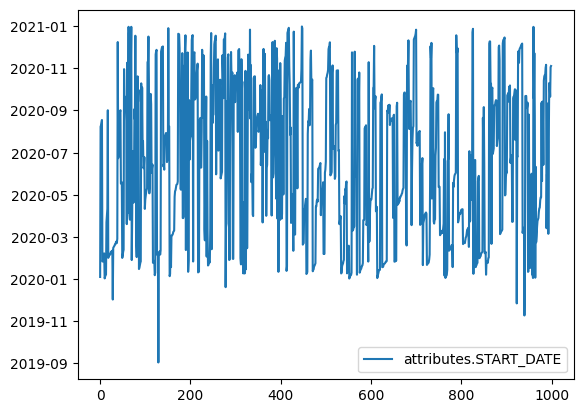

In [33]:
# time series Doesn’t look good

ColumnSTART_DATE.plot()

In [34]:
#Sorting Date
ColumnSTART_DATE.sort_values(by='attributes.START_DATE', inplace = True)
ColumnSTART_DATE

,attributes.START_DATE
129,2019-09-01 14:07:33
940,2019-11-08 17:00:21
923,2019-11-26 05:00:08
28,2019-12-01 19:31:03
278,2019-12-19 17:33:00
...,...
418,2020-12-29 14:00:15
960,2020-12-30 23:29:08
69,2020-12-31 00:45:12
63,2020-12-31 00:58:03


<Axes: >

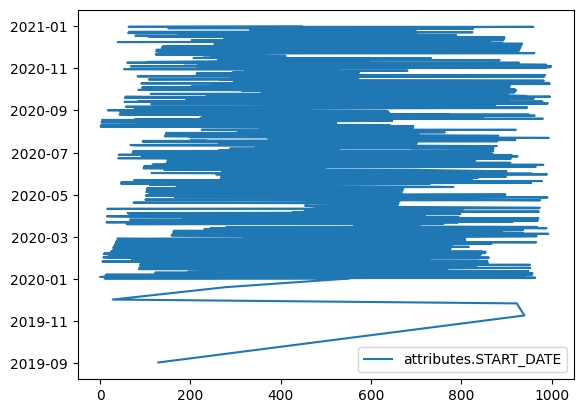

In [35]:
# time series Doesn’t look good

ColumnSTART_DATE.plot()

In [36]:
# learn and check how to call out a column from direct from df
df.loc[:,"attributes.START_DATE"]


0      1578054901000
1      1596889795000
2      1597049434000
3      1597412998000
4      1597708846000
           ...      
995    1602346776000
996    1602212448000
997    1600626806000
998    1604323059000
999    1604467803000
Name: attributes.START_DATE, Length: 1000, dtype: int64

In [37]:
ColumnSTART_DATE_SORT = ColumnSTART_DATE.loc[:,"attributes.START_DATE"]
ColumnSTART_DATE_SORT

129   2019-09-01 14:07:33
940   2019-11-08 17:00:21
923   2019-11-26 05:00:08
28    2019-12-01 19:31:03
278   2019-12-19 17:33:00
              ...        
418   2020-12-29 14:00:15
960   2020-12-30 23:29:08
69    2020-12-31 00:45:12
63    2020-12-31 00:58:03
447   2020-12-31 12:42:33
Name: attributes.START_DATE, Length: 1000, dtype: datetime64[ns]

In [38]:
# create sample dataframe
dateSortForChart = pd.DataFrame({
    'datetime': ColumnSTART_DATE_SORT
})

# convert 'datetime' column to datetime datatype
dateSortForChart['datetime'] = pd.to_datetime(dateSortForChart['datetime'])

# create new column containing only month and year information
dateSortForChart['month_year'] = dateSortForChart['datetime'].dt.strftime('%Y %B')

print(dateSortForChart)

               datetime      month_year
129 2019-09-01 14:07:33  2019 September
940 2019-11-08 17:00:21   2019 November
923 2019-11-26 05:00:08   2019 November
28  2019-12-01 19:31:03   2019 December
278 2019-12-19 17:33:00   2019 December
..                  ...             ...
418 2020-12-29 14:00:15   2020 December
960 2020-12-30 23:29:08   2020 December
69  2020-12-31 00:45:12   2020 December
63  2020-12-31 00:58:03   2020 December
447 2020-12-31 12:42:33   2020 December

[1000 rows x 2 columns]


In [39]:
dateSortForChart['month_year']

129    2019 September
940     2019 November
923     2019 November
28      2019 December
278     2019 December
            ...      
418     2020 December
960     2020 December
69      2020 December
63      2020 December
447     2020 December
Name: month_year, Length: 1000, dtype: object

In [40]:
dateSortForChartMMYY = dateSortForChart['month_year']
dateSortForChartMMYY

129    2019 September
940     2019 November
923     2019 November
28      2019 December
278     2019 December
            ...      
418     2020 December
960     2020 December
69      2020 December
63      2020 December
447     2020 December
Name: month_year, Length: 1000, dtype: object

In [41]:
# if plot this way 
# dateSortForChartMMYY.plot()
# TypeError: no numeric data to plot

In [42]:
# create sample dataframe
dateSortForChart = pd.DataFrame({
    'datetime': ColumnSTART_DATE_SORT
})

# convert 'datetime' column to datetime datatype
dateSortForChart['datetime'] = pd.to_datetime(dateSortForChart['datetime'])

# create new column containing only year and month information
dateSortForChart['year_month'] = dateSortForChart['datetime'].dt.strftime('%Y %m')

print(dateSortForChart)

               datetime year_month
129 2019-09-01 14:07:33    2019 09
940 2019-11-08 17:00:21    2019 11
923 2019-11-26 05:00:08    2019 11
28  2019-12-01 19:31:03    2019 12
278 2019-12-19 17:33:00    2019 12
..                  ...        ...
418 2020-12-29 14:00:15    2020 12
960 2020-12-30 23:29:08    2020 12
69  2020-12-31 00:45:12    2020 12
63  2020-12-31 00:58:03    2020 12
447 2020-12-31 12:42:33    2020 12

[1000 rows x 2 columns]


In [43]:
dateSortForChart['year_month']

129    2019 09
940    2019 11
923    2019 11
28     2019 12
278    2019 12
        ...   
418    2020 12
960    2020 12
69     2020 12
63     2020 12
447    2020 12
Name: year_month, Length: 1000, dtype: object

In [44]:
dateSortForChartYYMM = dateSortForChart['year_month']
dateSortForChartYYMM

129    2019 09
940    2019 11
923    2019 11
28     2019 12
278    2019 12
        ...   
418    2020 12
960    2020 12
69     2020 12
63     2020 12
447    2020 12
Name: year_month, Length: 1000, dtype: object

In [45]:
#dateSortForChartYYMM.dtypes
dateSortForChart.dtypes

datetime      datetime64[ns]
year_month            object
dtype: object

In [46]:
dateSortForChart['count'] = 1
dateSortForChart

,datetime,year_month,count
129,2019-09-01 14:07:33,2019 09,1
940,2019-11-08 17:00:21,2019 11,1
923,2019-11-26 05:00:08,2019 11,1
28,2019-12-01 19:31:03,2019 12,1
278,2019-12-19 17:33:00,2019 12,1
...,...,...,...
418,2020-12-29 14:00:15,2020 12,1
960,2020-12-30 23:29:08,2020 12,1
69,2020-12-31 00:45:12,2020 12,1
63,2020-12-31 00:58:03,2020 12,1


In [47]:
# time series Doesn’t look good

dateSortForChart['year_month'] = pd.to_datetime(dateSortForChart['year_month'])
dateSortForChartDropped = dateSortForChart.drop(columns=['datetime'])
dateSortForChartDropped

,year_month,count
129,2019-09-01,1
940,2019-11-01,1
923,2019-11-01,1
28,2019-12-01,1
278,2019-12-01,1
...,...,...
418,2020-12-01,1
960,2020-12-01,1
69,2020-12-01,1
63,2020-12-01,1


In [48]:
dateForChart = dateSortForChartDropped["year_month"]
valueForChart = dateSortForChartDropped["count"]

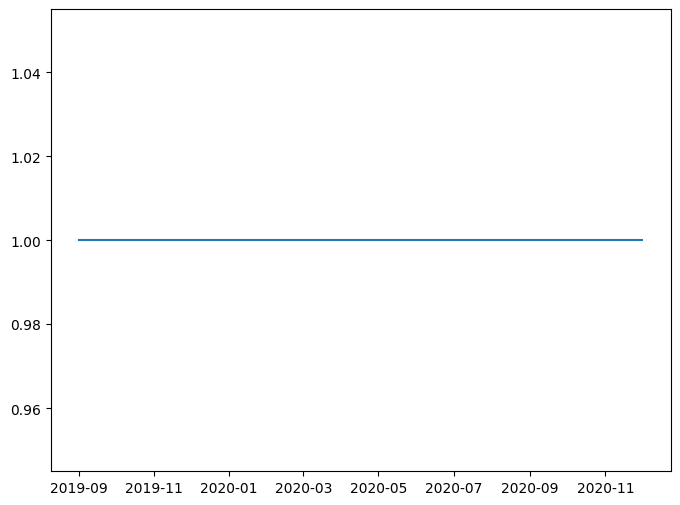

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(dateForChart, valueForChart);

In [50]:
# !!! the following method made My time series Works 

dateSortForChartDroppedCount = dateSortForChart.drop(columns=['count','datetime'])
dateSortForChartDroppedCount


,year_month
129,2019-09-01
940,2019-11-01
923,2019-11-01
28,2019-12-01
278,2019-12-01
...,...
418,2020-12-01
960,2020-12-01
69,2020-12-01
63,2020-12-01


In [51]:
# !!! the following method made My time series Works 
# Get count duplicates single column using dataframe.pivot_table() !!!! 

dateSortForChartDroppedCount2 = dateSortForChartDroppedCount.pivot_table(index = ['year_month'], aggfunc ='size')
dateSortForChartDroppedCount2

year_month
2019-09-01      1
2019-11-01      2
2019-12-01      2
2020-01-01    145
2020-02-01     86
2020-03-01     96
2020-04-01     70
2020-05-01     68
2020-06-01     78
2020-07-01     60
2020-08-01     76
2020-09-01     95
2020-10-01     81
2020-11-01     72
2020-12-01     68
dtype: int64

<Axes: xlabel='year_month'>

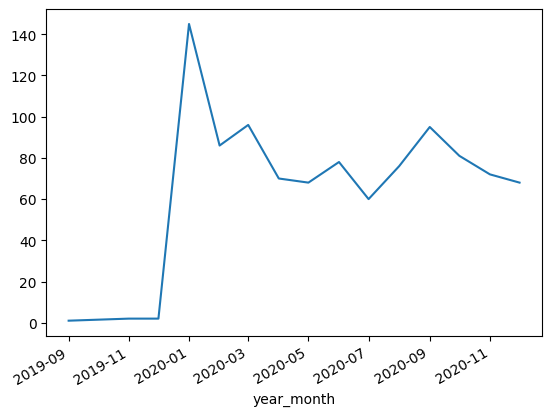

In [52]:
dateSortForChartDroppedCount2.plot()

In [74]:
# Here's an example of how you can use folium to create a simple map:
import folium 
map = folium.Map(location=[38.90, -77.00], zoom_start=11)

In [75]:
#points = [[20.5920749, 85.8017591], [20.5218388, 85.7341526], [21.3470154, 83.6320212]]

#new_df = pd.DataFrame(df[['attributes.LATITUDE', 'attributes.LONGITUDE']].values.tolist(), columns=['coordinates'])
points = pd.DataFrame(df[['attributes.LATITUDE', 'attributes.LONGITUDE']].values.tolist(), columns=['latitude', 'longitude'])

points

,latitude,longitude
0,38.931446,-77.040064
1,38.930500,-76.966828
2,38.836205,-76.988704
3,38.940277,-77.025102
4,38.864368,-76.992058
...,...,...
995,38.934270,-77.034310
996,38.911115,-77.003574
997,38.882520,-76.990887
998,38.923915,-77.039039


In [76]:
#for point in points:
    #folium.Marker(point, popup='Point').add_to(map)
    
for index, row in points.iterrows():
    lat, lon = row['latitude'], row['longitude']
    folium.Marker([lat, lon], popup='Point').add_to(map)

In [80]:
map